In [82]:
import sympy
#from sympy import *
#init_printing(use_unicode=False, wrap_line=False)
x = sympy.Symbol('x')
sympy.integrate(x**2 + x + 1, x)

x**3/3 + x**2/2 + x

In [230]:
f,x,fmin=sympy.symbols('f,x,fmin',positive=True)
sympy.integrate(f/(f+x*(1-f)),f)

-f/(x - 1) - x*log(f*(x - 1) - x)/(x - 1)**2

In [232]:
sympy.integrate(f/(f+x*(1-f))*sympy.log(f/(f+x*(1-f))),f)

KeyboardInterrupt: 

In [23]:
p1=sympy.integrate(f/(f+x*(1-f))/f,(f,fmin,1))
p1

log(fmin*(x - 1) - x)/(x - 1) - I*pi/(x - 1)

In [22]:
import numpy as np
p1.subs(x,.1)

-1.11111111111111*log(-0.9*fmin - 0.1) + 1.11111111111111*I*pi

In [103]:
P0(10**-3.5,10**-7),2/7

(0.5001385475744644, 0.2857142857142857)

In [109]:
P1(.1)

0.963114272156024

<timed exec>:6: RuntimeWarning: invalid value encountered in divide
<timed exec>:3: RuntimeWarning: invalid value encountered in divide


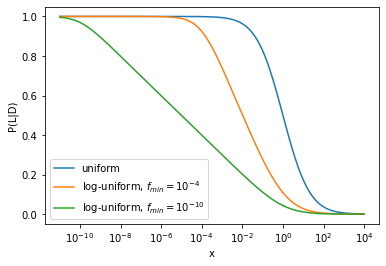

CPU times: user 648 ms, sys: 65.6 ms, total: 714 ms
Wall time: 758 ms


In [110]:
%%time
from matplotlib import pyplot as plt
def P0(x,fmin):
    return np.log(x+fmin*(1-x))/(1-x)/np.log(fmin)#*np.heaviside(x-fmin,1)

def P1(x):
    return (1-x+x*np.log(x))/(1-x)**2

step=10**-5
smax=10000
#xs = np.arange(0.00,smax,step)
xs = smax*10.0**-np.arange(0,15,.01)
plt.plot(xs,P1(xs),label='uniform')
plt.plot(xs,P0(xs,10**-4),label='log-uniform, $f_{min}=10^{-4}$')
plt.plot(xs,P0(xs,10**-10),label='log-uniform, $f_{min}=10^{-10}$')
plt.xscale('log')
plt.legend()
#plt.xlim(0,smax)
plt.xlabel('x')
plt.ylabel('P(L|D)')
plt.show()
#plt.savefig('u_vs_lu.pdf',bbox_inches='tight')

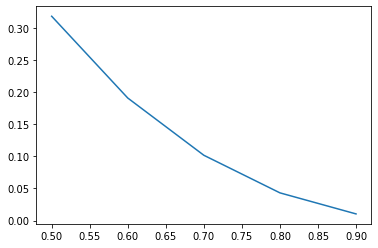

In [193]:
def ss(x):
    return np.log(1/x)+1/2*x**2-1/2
xs=np.arange(.5,1,.1)
plt.plot(xs,ss(xs))

In [128]:
x,sigma1,sigma2=sympy.symbols('x,sigma1,sigma2',positive=True)
n1=sympy.exp(-x**2/sigma1**2/2)/\
sympy.sqrt(2*sympy.pi*sigma1**2)
n2=sympy.exp(-x**2/sigma2**2/2)/\
sympy.sqrt(2*sympy.pi*sigma2**2)
sympy.logcombine(sympy.integrate(n1*sympy.log(n1/n2),
                (x,-sympy.oo,sympy.oo)))

sigma1**2/(2*sigma2**2) + log(sigma2/sigma1) - 1/2

In [190]:
f,n=sympy.symbols('f,n',positive=True)
sympy.integrate(n*(1-f)**(n-1)*sympy.log(n*(1-f)**(n-1)),(f,0,1))
#np.log(2)-1/2

n*Integral((1 - f)**(n - 1)*(log(n) + log((1 - f)**n/(1 - f))), (f, 0, 1))

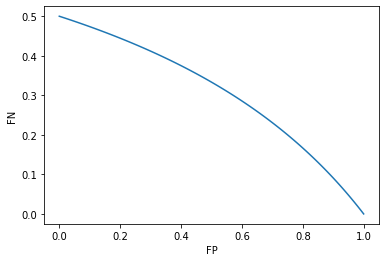

In [131]:
fps=np.arange(0,1.01,.01)
plt.plot(fps,(1-fps)/(2-fps))
plt.xlabel('FP')
plt.ylabel('FN')
plt.show()

<Figure size 1440x1440 with 0 Axes>

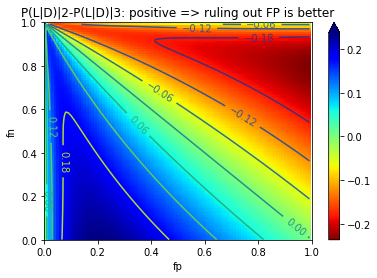

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import norm


def P1(x):
    return (1-x+x*np.log(x))/(1-x)**2

def Pdiff(fp,fn):
    return P1(fp**2/(1-2*fn+fn**2))-P1((2*fp-fp**2)/(1-fn**2))
    #return P1((1-(1-fp)**2)/(1-fn))-P1(fp/(1-fn)**2)

fps=np.arange(.001,1,.01)
fns=np.arange(.001,1,.01)


X,Y = np.meshgrid(fps,fns)
Z = Pdiff(X,Y)


plt.figure(figsize=(20,20))
fig, ax = plt.subplots()

ax.set_xlabel('fp')
ax.set_ylabel('fn')
ax.set_title('P(L|D)|2-P(L|D)|3: positive => ruling out FP is better')


pcm = ax.pcolormesh(X, Y, Z,
                   #norm = LogNorm(vmin=abs(Z).min(),vmax=abs(Z).max()),
                   cmap='jet_r', shading='nearest'
                   )
fig.colorbar(pcm, ax=ax, extend='max')
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True,fontsize=10)

#xs = np.arange(.1,10,.01)
#plt.plot(xs,np.arctan(1/xs),c='black')
#plt.plot([1,1],[0,1],c='white',linewidth=3,linestyle='--')
#plt.plot(fps,(1-fps)/(2-fps)+.01)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

In [165]:
p1,p2,q1,q2=sympy.symbols('p1,p2,q1,q2',integer=True)
sympy.simplify(sympy.integrate(f**p1*(1-f)**p2*sympy.log(f),(f,0,1)))

(-1)**p2*Integral(f**p1*(f - 1)**p2*log(f), (f, 0, 1))

In [178]:
sympy.solve(p1/(2-p1)*(1+p2)/(1-p2)-1,p2)

[1 - p1]

/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1444171709.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(xs,xs*np.log(xs))
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1444171709.py:2: RuntimeWarning: invalid value encountered in multiply
  plt.plot(xs,xs*np.log(xs))


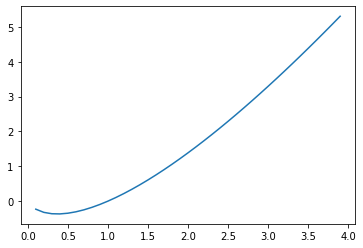

In [195]:
xs=np.arange(0,4,.1)
plt.plot(xs,xs*np.log(xs))

/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/3148797471.py:2: RuntimeWarning: invalid value encountered in divide
  return (1-x+x*np.log(x))/(1-x)**2
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/3148797471.py:5: RuntimeWarning: divide by zero encountered in log
  return p*np.log(p)+(1-p)*np.log(1-p)+np.log(2)
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/3148797471.py:5: RuntimeWarning: invalid value encountered in multiply
  return p*np.log(p)+(1-p)*np.log(1-p)+np.log(2)


<Figure size 1440x1440 with 0 Axes>

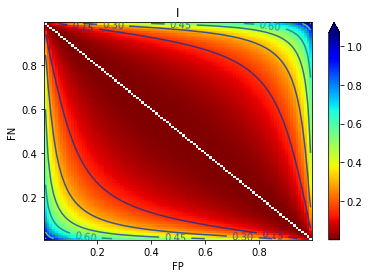

In [226]:
def PLD(x):
    return (1-x+x*np.log(x))/(1-x)**2

def S(p):
    return p*np.log(p)+(1-p)*np.log(1-p)+np.log(2)

FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)

X,Y = np.meshgrid(FPs,FNs)

Z = S(PLD(X/(1-Y)))+S(PLD((1-X)/Y))
Z2 = PLD(X/(1-Y))



plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.set_xlabel('Probability of NTAs existing')
ax.set_ylabel('FN')
ax.set_xlabel('FP')
#ax.set_title('P( N>0 | null )')
ax.set_title('I')


pcm = ax.pcolormesh(X, Y, Z,
                   #norm = LogNorm(vmin=abs(Z).min(),vmax=abs(Z).max()),
                   cmap='jet_r', shading='nearest')
fig.colorbar(pcm, ax=ax, extend='max')
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True,fontsize=10)
#plt.xlim(0,.5)
#plt.ylim(0,.5)
plt.show()

<Figure size 1440x1440 with 0 Axes>

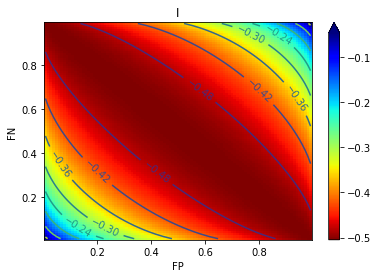

CPU times: user 293 ms, sys: 53.2 ms, total: 346 ms
Wall time: 213 ms


In [411]:
%%time
def PLDf(x,f):
    return f/(f+x*(1-f))

def PLgD(FP,FN,f):
    return (1-FN)*f/((1-FN)*f+FP*(1-f))

def PLgND(FP,FN,f):
    return FN*f/(FN*f+(1-FP)*(1-f))

def PD(FP,FN,f):
    return (1-FN)*f+FP*(1-f)

def S(p):
    return p*np.log(p)+(1-p)*np.log(1-p)+np.log(2)

def Sr(Pld,Pd):
    return Pld*Pd*np.log(Pld)

FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)
fs = np.arange(0.01,1.00,0.01)
#fs = 10**-np.arange(0.01,5,0.01)

X,Y,F = np.meshgrid(FPs,FNs,fs)


#Z = S(PLDf(X/(1-Y),F))+S(PLDf((1-X)/Y,F))
Z = Sr(PLgD(X,Y,F),PD(X,Y,F))+\
    Sr(1-PLgD(X,Y,F),PD(X,Y,F))+\
    Sr(PLgND(X,Y,F),1-PD(X,Y,F))+\
    Sr(1-PLgND(X,Y,F),1-PD(X,Y,F))

Z = np.mean(Z,axis=2)
X=X[:,:,0]
Y=Y[:,:,0]

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.set_ylabel('FN')
ax.set_xlabel('FP')
ax.set_title('I')

pcm = ax.pcolormesh(X, Y, Z,
                   #norm = LogNorm(vmin=abs(Z).min(),vmax=abs(Z).max()),
                   cmap='jet_r', shading='nearest')
fig.colorbar(pcm, ax=ax, extend='max')
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True,fontsize=10)
#plt.xlim(0,.5)
#plt.ylim(0,.5)
plt.show()

In [384]:
np.sum(1+0*fs)/len(fs)

1.0

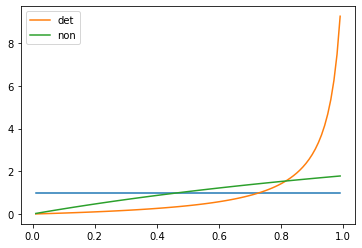

In [442]:
fs = np.arange(0.01,1.00,0.01)
#fs = 10**-np.arange(0.01,5,0.01)

fp=.3
fn=.99

plt.plot(fs,1+0*fs)
plt.plot(fs,PLgD(fp,fn,fs)/np.sum(PLgD(fp,fn,fs))*len(fs),label='det')
plt.plot(fs,PLgND(fp,fn,fs)/np.sum(PLgND(fp,fn,fs))*len(fs),label='non')
plt.legend()
#plt.xscale('log')

In [333]:
X,Y,F = np.meshgrid(FPs,FNs,fs)

PLgDt = np.sum(PLgD(X,Y,F),axis=2)
PLgDn = PLgD(X,Y,F)/np.stack([PLgDt]*10,axis=2)

In [475]:
def contourplot(X,Y,Z,title=''):
    plt.figure(figsize=(20,20))
    fig, ax = plt.subplots()
    ax.set(aspect=1)
    ax.set_ylabel('FN')
    ax.set_xlabel('FP')
    ax.set_title(title)

    pcm = ax.pcolormesh(X, Y, Z,
                       #norm = LogNorm(vmin=abs(Z).min(),vmax=abs(Z).max()),
                       cmap='jet_r', shading='nearest')
    fig.colorbar(pcm, ax=ax, extend='max')
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True,fontsize=10)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

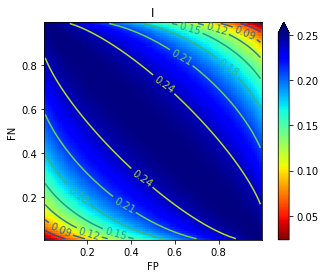

In [500]:
FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)
fs = np.arange(0.01,1.00,0.01)
#fs = np.arange(0.01,.02,0.01)
#fs = 10**-np.arange(0.01,10,0.01)

X,Y,F = np.meshgrid(FPs,FNs,fs)


#Z = S(PLDf(X/(1-Y),F))+S(PLDf((1-X)/Y,F))

PLgDt = np.sum(PLgD(X,Y,F),axis=2)
PLgDn = PLgD(X,Y,F)/np.stack([PLgDt]*len(fs),axis=2)*len(fs)

PLgNDt = np.sum(PLgND(X,Y,F),axis=2)
PLgNDn = PLgND(X,Y,F)/np.stack([PLgNDt]*len(fs),axis=2)*len(fs)

Z = PLgDn*np.log(PLgDn/F)*PD(X,Y,F)+\
    PLgNDn*np.log(PLgNDn/F)*(1-PD(X,Y,F))+\
    0*(1-PLgD(X,Y,F))*np.log((1-PLgD(X,Y,F))/(1-F))

#Z = PLgDn

Z = PLgD(X,Y,F)*np.log(PLgD(X,Y,F))*PD(X,Y,F)+\
    PLgND(X,Y,F)*np.log(PLgND(X,Y,F))*(1-PD(X,Y,F))+\
    0*(1-PLgD(X,Y,F))*np.log((1-PLgD(X,Y,F))/(1-F))

Z = -np.mean(Z,axis=2)
X=X[:,:,0]
Y=Y[:,:,0]

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.set(aspect=1)
ax.set_ylabel('FN')
ax.set_xlabel('FP')
ax.set_title('I')

pcm = ax.pcolormesh(X, Y, Z,
                   #norm = LogNorm(vmin=abs(Z).min(),vmax=abs(Z).max()),
                   cmap='jet_r', shading='nearest')
fig.colorbar(pcm, ax=ax, extend='max')
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True,fontsize=10)
#plt.xlim(0,.5)
#plt.ylim(0,.5)
plt.show()

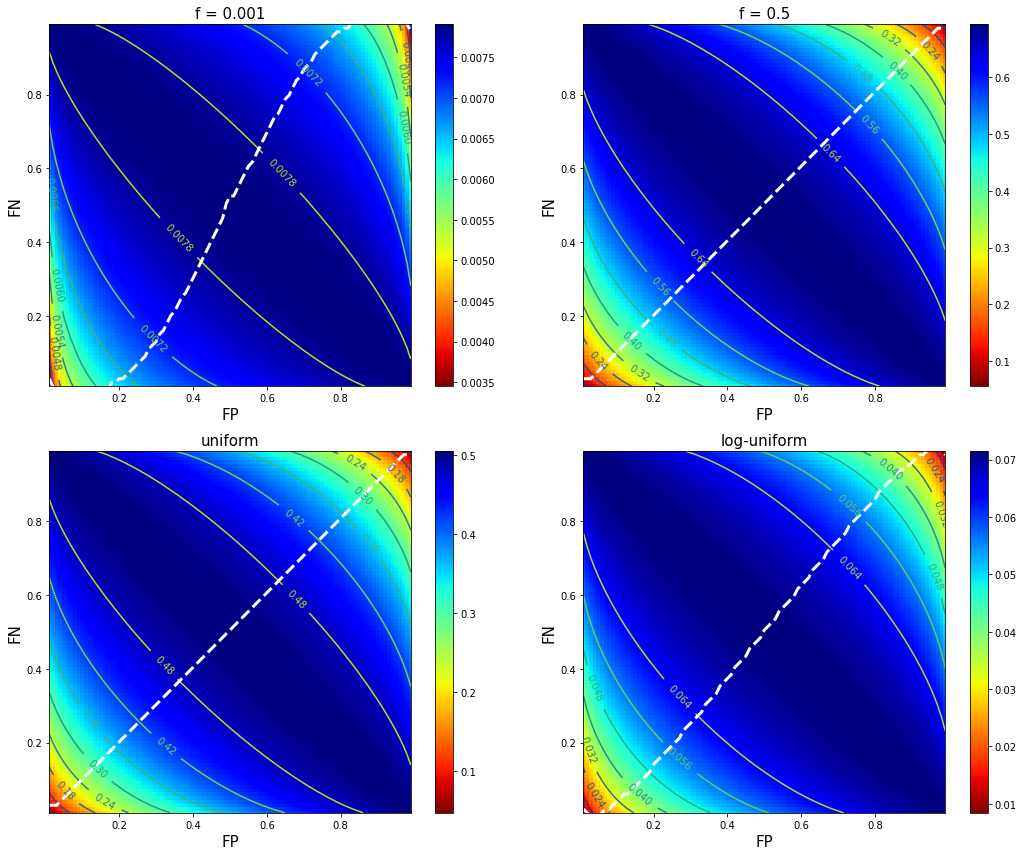

CPU times: user 1.94 s, sys: 387 ms, total: 2.33 s
Wall time: 2.19 s


In [112]:
%%time
import numpy as np
from matplotlib import pyplot as plt
import torch

step=.01
FPs = np.arange(step,1.00,step)
FNs = np.arange(step,1.00,step)
fs = np.arange(step,1.00,step)
fs_log = 10**-np.arange(0.01,10,step)
f1 = .001
f2 = .5

def PLgD(FP,FN,f):
    # probability of life given detection
    return (1-FN)*f/((1-FN)*f+FP*(1-f))

def PLgND(FP,FN,f):
    # probability of life given nondetection
    return FN*f/(FN*f+(1-FP)*(1-f))

def PD(FP,FN,f):
    # probability of detection
    return (1-FN)*f+FP*(1-f)

def S(p):
    return p*np.log(p)+(1-p)*np.log(1-p)

def Sr(Pld,Pd):
    # conditional entropy
    return -Pld*Pd*np.log(Pld)-(1-Pld)*Pd*np.log(1-Pld)

def make_subplot(ax,X,Y,Z,title=''):
    ax.set(aspect=1)
    ax.set_ylabel('FN',fontsize=15)
    ax.set_xlabel('FP',fontsize=15)
    ax.set_title(title,fontsize=15)

    pcm = ax.pcolormesh(X, Y, Z,
                        cmap='jet_r', 
                        shading='nearest')
    fig.colorbar(pcm, ax=ax)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True,fontsize=10)
    a,b = torch.gradient(torch.Tensor(Z))
    ab=(a-b).numpy()
    ys = np.mean(ab>=-.00,axis=0)
    #zs = np.convolve(ys,np.ones(20)/20,mode='same')
    ##zs =np.concatenate([ys[:10],zs[10:-10],ys[-10:]])
    #zs = np.convolve(zs,np.ones(3)/3,mode='same')
    ax.plot(np.arange(step,1,step),ys,c='white',linestyle='--',linewidth=3)
    ax.set_xlim(step,1-step)
    ax.set_ylim(step,1-step)
    
    
X,Y = np.meshgrid(FPs,FNs)
Z1 = Sr(PLgD(X,Y,f1),PD(X,Y,f1)) + Sr(PLgND(X,Y,f1),1-PD(X,Y,f1))
Z11 = Sr(PLgD(X,Y,f2),PD(X,Y,f2)) + Sr(PLgND(X,Y,f2),1-PD(X,Y,f2))

X,Y,F = np.meshgrid(FPs,FNs,fs)
Z2 = Sr(PLgD(X,Y,F),PD(X,Y,F)) + Sr(PLgND(X,Y,F),1-PD(X,Y,F))
Z2 = np.mean(Z2,axis=2)

X,Y,F2 = np.meshgrid(FPs,FNs,fs_log)
Z3 = Sr(PLgD(X,Y,F2),PD(X,Y,F2)) + Sr(PLgND(X,Y,F2),1-PD(X,Y,F2))
Z3 = np.mean(Z3,axis=2)

X=X[:,:,0]
Y=Y[:,:,0]


fig, axs = plt.subplots(2,2,figsize=(15,12))

make_subplot(axs[0][0], X, Y, Z1,'f = '+str(f1))
make_subplot(axs[0][1], X, Y, Z11,'f = '+str(f2))
make_subplot(axs[1][0], X, Y, Z2,'uniform')
make_subplot(axs[1][1], X, Y, Z3,'log-uniform')

plt.tight_layout()
plt.savefig('conditional_entropy.png',bbox_inches='tight')
plt.show()

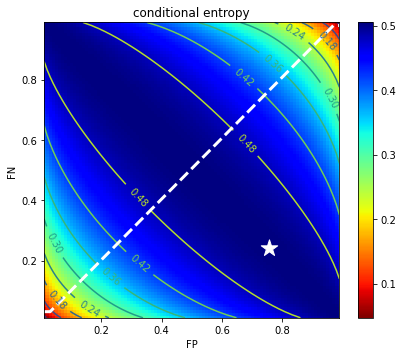

CPU times: user 844 ms, sys: 297 ms, total: 1.14 s
Wall time: 942 ms


In [111]:
%%time
import numpy as np
from matplotlib import pyplot as plt
import torch

step=.01
FPs = np.arange(step,1.00,step)
FNs = np.arange(step,1.00,step)
fs = np.arange(step,1.00,step)
fs_log = 10**-np.arange(0.01,10,step)
f1 = .001
f2 = .5

def PLgD(FP,FN,f):
    # probability of life given detection
    return (1-FN)*f/((1-FN)*f+FP*(1-f))

def PLgND(FP,FN,f):
    # probability of life given nondetection
    return FN*f/(FN*f+(1-FP)*(1-f))

def PD(FP,FN,f):
    # probability of detection
    return (1-FN)*f+FP*(1-f)

def S(p):
    return p*np.log(p)+(1-p)*np.log(1-p)

def Sr(Pld,Pd):
    # conditional entropy
    return -Pld*Pd*np.log(Pld)-(1-Pld)*Pd*np.log(1-Pld)

def make_subplot(ax,X,Y,Z,title=''):
    ax.set(aspect=1)
    ax.set_ylabel('FN')
    ax.set_xlabel('FP')
    ax.set_title(title)

    pcm = ax.pcolormesh(X, Y, Z,
                        cmap='jet_r', 
                        shading='nearest')
    fig.colorbar(pcm, ax=ax)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True,fontsize=10)
    a,b = torch.gradient(torch.Tensor(Z))
    ab=(a-b).numpy()
    ys = np.mean(ab>=-.00,axis=0)
    #zs = np.convolve(ys,np.ones(20)/20,mode='same')
    ##zs =np.concatenate([ys[:10],zs[10:-10],ys[-10:]])
    #zs = np.convolve(zs,np.ones(3)/3,mode='same')
    ax.plot(np.arange(step,1,step),ys,c='white',linestyle='--',linewidth=3)
    ax.set_xlim(step,1-step)
    ax.set_ylim(step,1-step)
    
    
X,Y = np.meshgrid(FPs,FNs)
Z1 = Sr(PLgD(X,Y,f1),PD(X,Y,f1)) + Sr(PLgND(X,Y,f1),1-PD(X,Y,f1))
Z11 = Sr(PLgD(X,Y,f2),PD(X,Y,f2)) + Sr(PLgND(X,Y,f2),1-PD(X,Y,f2))

X,Y,F = np.meshgrid(FPs,FNs,fs)
Z2 = Sr(PLgD(X,Y,F),PD(X,Y,F)) + Sr(PLgND(X,Y,F),1-PD(X,Y,F))
Z2 = np.mean(Z2,axis=2)

X,Y,F2 = np.meshgrid(FPs,FNs,fs_log)
Z3 = Sr(PLgD(X,Y,F2),PD(X,Y,F2)) + Sr(PLgND(X,Y,F2),1-PD(X,Y,F2))
Z3 = np.mean(Z3,axis=2)

X=X[:,:,0]
Y=Y[:,:,0]


fig, ax = plt.subplots(1,1,figsize=(6,5))

make_subplot(ax, X, Y, Z2,'conditional entropy')
#ax.plot([0.75794, 0.6308], [0.24206, 0.36944],c='white',linestyle='-',linewidth=3)
ax.scatter([0.75794], [0.24206],c='white',s=300,marker='*')
#make_subplot(axs[0][1], X, Y, Z11,'f = '+str(f2))
#3make_subplot(axs[1][0], X, Y, Z2,'uniform')
#make_subplot(axs[1][1], X, Y, Z3,'log-uniform')

plt.tight_layout()
plt.savefig('enceladus_data_recommendation.png',bbox_inches='tight')
plt.show()

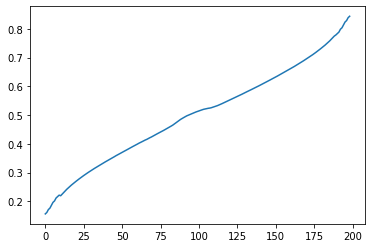

In [52]:
a,b = torch.gradient(torch.Tensor(Z1))
ab=(a-b).numpy()
ys = np.mean(ab<=0,axis=1)
zs = np.convolve(ys,np.ones(20)/20,mode='same')
zs =np.concatenate([ys[:10],zs[10:-10],ys[-10:]])
plt.plot(zs)
#plt.plot(ys)


In [7]:
import numpy as np
10**-np.arange(0.01,10,0.01)[0]

0.9772372209558107

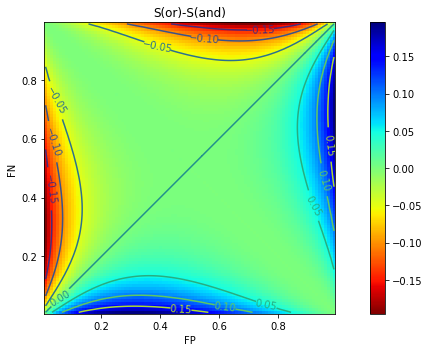

In [605]:
FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)
fs = np.arange(0.01,1.00,0.01)
fs_log = 10**-np.arange(0.01,10,0.01)
f1=.001

def PLgD(FP,FN,f):
    # probability of life given detection
    return (1-FN)*f/((1-FN)*f+FP*(1-f))

def PLgND(FP,FN,f):
    # probability of life given nondetection
    return FN*f/(FN*f+(1-FP)*(1-f))

def PD(FP,FN,f):
    # probability of detection
    return (1-FN)*f+FP*(1-f)

def S(p):
    return p*np.log(p)+(1-p)*np.log(1-p)

def Sr(Pld,Pd):
    # conditional entropy
    return -Pld*Pd*np.log(Pld)-(1-Pld)*Pd*np.log(1-Pld)

def make_subplot(ax,X,Y,Z,title=''):
    ax.set(aspect=1)
    ax.set_ylabel('FN')
    ax.set_xlabel('FP')
    ax.set_title(title)

    pcm = ax.pcolormesh(X, Y, Z,
                        cmap='jet_r', 
                        shading='nearest')
    fig.colorbar(pcm, ax=ax)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=True,fontsize=10)
    
    



X,Y,F2 = np.meshgrid(FPs,FNs,fs)
X2 = 1-(1-X)**2
X3 = X**2
Y2 = 1-(1-Y)**2
Y3 = Y**2
Z0 = Sr(PLgD(X,Y,F2),PD(X,Y,F2)) + Sr(PLgND(X,Y,F2),1-PD(X,Y,F2))
Z1 = Sr(PLgD(X2,Y3,F2),PD(X2,Y3,F2)) + Sr(PLgND(X2,Y3,F2),1-PD(X2,Y3,F2))
Z2 = Sr(PLgD(X3,Y2,F2),PD(X3,Y2,F2)) + Sr(PLgND(X3,Y2,F2),1-PD(X3,Y2,F2))
Z3 = np.mean(Z1-Z2,axis=2)

X=X[:,:,0]
Y=Y[:,:,0]


fig, axs = plt.subplots(figsize=(10,5))

make_subplot(axs, X, Y, Z3,'S(or)-S(and)')


plt.tight_layout()
plt.savefig('two_signal_S_difference.png',bbox_inches='tight')
plt.show()

<Figure size 1440x1440 with 0 Axes>

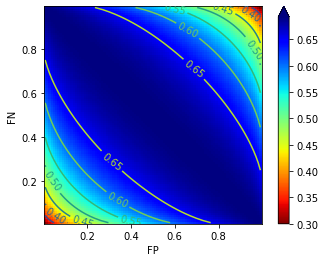

In [487]:
FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)
fs = np.arange(0.01,1.00,0.01)
#fs = np.arange(0.01,.02,0.01)
#fs = 10**-np.arange(0.01,10,0.01)

X,Y,F = np.meshgrid(FPs,FNs,fs)

PLgDt = np.sum(PLgD(X,Y,F),axis=2)
PLgDn = PLgD(X,Y,F)/np.stack([PLgDt]*len(fs),axis=2)*len(fs)

PLgNDt = np.sum(PLgND(X,Y,F),axis=2)
PLgNDn = PLgND(X,Y,F)/np.stack([PLgNDt]*len(fs),axis=2)*len(fs)

Z = PLgDn*np.log(PLgDn/F)*PD(X,Y,F)+\
    PLgNDn*np.log(PLgNDn/F)*(1-PD(X,Y,F))+\
    0*(1-PLgD(X,Y,F))*np.log((1-PLgD(X,Y,F))/(1-F))

contourplot(X[:,:,0],Y[:,:,0],np.mean(Z,axis=2))

<Figure size 1440x1440 with 0 Axes>

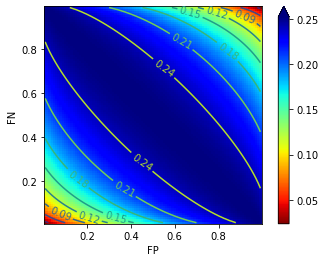

In [497]:
FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)
fs = np.arange(0.01,1.00,0.01)
#fs = np.arange(0.01,.02,0.01)
#fs = 10**-np.arange(0.01,10,0.01)

X,Y,F = np.meshgrid(FPs,FNs,fs)

Z = -PLgD(X,Y,F)*np.log(PLgD(X,Y,F))*PD(X,Y,F)+\
    -PLgND(X,Y,F)*np.log(PLgND(X,Y,F))*(1-PD(X,Y,F))

contourplot(X[:,:,0],Y[:,:,0],np.mean(Z,axis=2))

<Figure size 1440x1440 with 0 Axes>

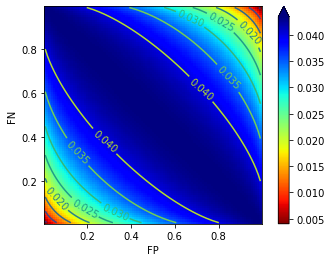

In [498]:
FPs = np.arange(0.01,1.00,0.01)
FNs = np.arange(0.01,1.00,0.01)
fs = np.arange(0.01,1.00,0.01)
#fs = np.arange(0.01,.02,0.01)
fs = 10**-np.arange(0.01,10,0.01)

X,Y,F = np.meshgrid(FPs,FNs,fs)

Z = -PLgD(X,Y,F)*np.log(PLgD(X,Y,F))*PD(X,Y,F)+\
    -PLgND(X,Y,F)*np.log(PLgND(X,Y,F))*(1-PD(X,Y,F))

contourplot(X[:,:,0],Y[:,:,0],np.mean(Z,axis=2))

/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/3848007309.py:8: RuntimeWarning: divide by zero encountered in divide
  return -((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2) * np.log(((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2)) - (1 - (((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2))) * np.log(1 - (((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2)))
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/3848007309.py:8: RuntimeWarning: invalid value encountered in multiply
  return -((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2) * np.log(((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2)) - (1 - (((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2))) * np.log(1 - (((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2)))
/var/

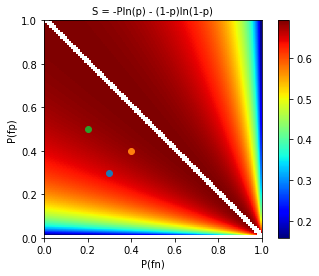

In [227]:
from pylab import figure, cm

import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

def f(x1,x2):
    return -((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2) * np.log(((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2)) - (1 - (((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2))) * np.log(1 - (((x1 - 1) * (x2 * np.log((1 - x1) / (x2)) + x1 + x2 - 1)) / ((x1 + x2 - 1)**2)))

x1_min = 0
x1_max = 1 #P(fn)
x2_min = 0
x2_max = 1#P(fp)

x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

y = f(x1,x2)

probabilities_of_false_positives = [0.3, 0.4, 0.5]
probabilities_of_false_negatives = [0.3, 0.4, 0.2]


# probabilities_of_false_positives = [0.8, 0.75, 0.73, 0.74, 0.5, 0.49, 0.43, 0.42, 0.41, 0.3, 0.15, 0.2, 0.1, 0.16, 0.05, 0.07, 0.03, 0.2, 0.25]
# probabilities_of_false_negatives = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
plt.ylabel('P(fp)')  
plt.xlabel('P(fn)')
for (probability1, probability2) in zip(probabilities_of_false_positives, probabilities_of_false_negatives):
    plt.scatter(x = probability2, y = probability1)
plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')

plt.colorbar()

plt.title("S = -Pln(p) - (1-p)ln(1-p)", fontsize=10)

#plt.savefig("information_gain_probability_of_life_given_detection.png")

plt.show()

/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1001724389.py:22: RuntimeWarning: invalid value encountered in divide
  temp = (1-x+x*np.log(x))/(1-x)**2
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1001724389.py:26: RuntimeWarning: invalid value encountered in divide
  temp = 1 - (1-Ld+Ld*np.log(Ld))/(1-Ld)**2
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1001724389.py:30: RuntimeWarning: divide by zero encountered in log
  tempplus = Pplus*np.log(Pplus)*p + (1-Pplus)*np.log(1-Pplus)*p
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1001724389.py:30: RuntimeWarning: invalid value encountered in multiply
  tempplus = Pplus*np.log(Pplus)*p + (1-Pplus)*np.log(1-Pplus)*p
/var/folders/l4/v68vxl717h58n_zdw4d24xgh0000gn/T/ipykernel_47874/1001724389.py:31: RuntimeWarning: divide by zero encountered in log
  tempminus = Pminus*np.log(Pminus)*(1-p) + (1-Pminus)*np.log(1-Pminus)*(1-p)
/var/folders/l4/v68vxl717h58n_zdw4d24xg

0.05060391503540192
0.042586422324031654
0.03498542274052478
0.02790503956684715
0.021970012494793835
0.019887546855476886
0.021970012494793835
0.02790503956684715
0.03498542274052478
0.042586422324031654
0.05060391503540192


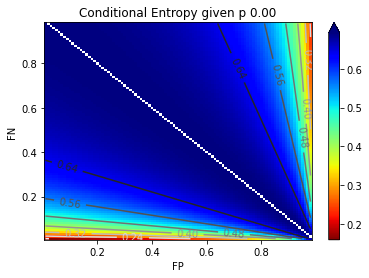

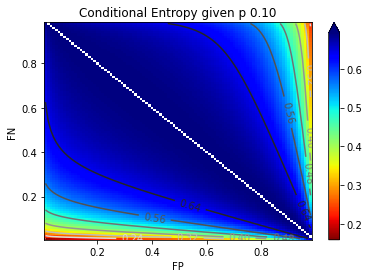

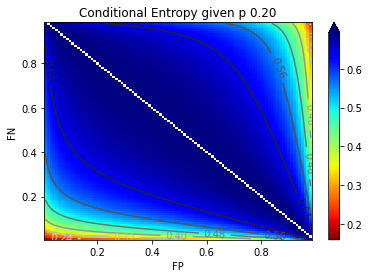

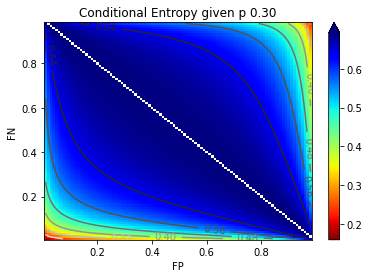

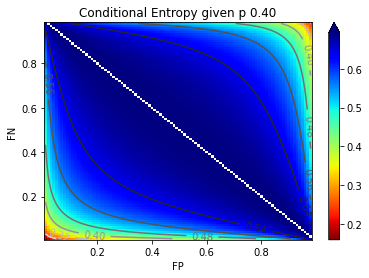

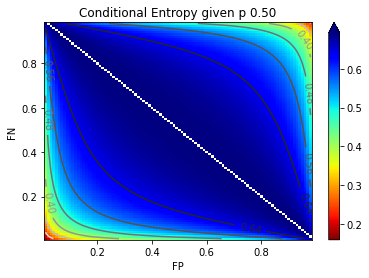

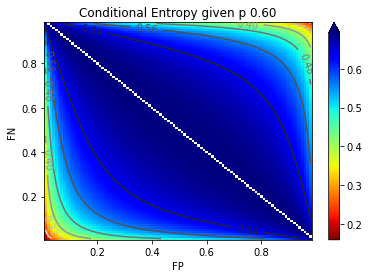

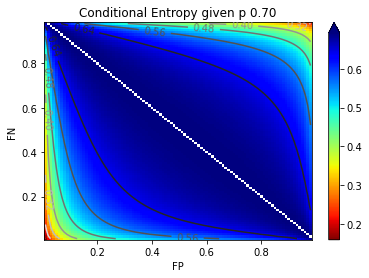

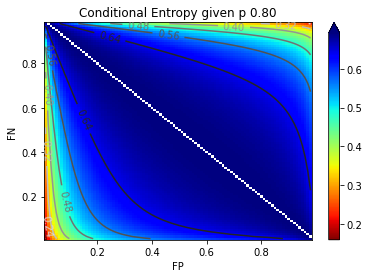

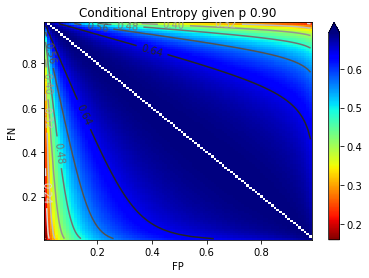

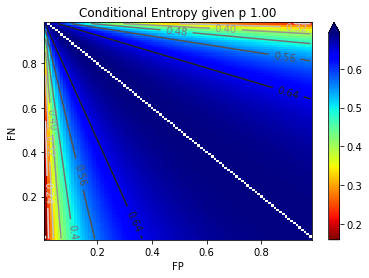

In [463]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 27 00:04:41 2022

@author: USER
"""

#Conditional Entropy of L|D


import matplotlib.pyplot as plt
import numpy as np


def x(FP,FN):
    return FP/(1-FN)

def Lambda(FP,FN):
    return (1-FP)/FN

def Pplus(x):
    temp = (1-x+x*np.log(x))/(1-x)**2
    return temp
    
def Pminus(Ld):
    temp = 1 - (1-Ld+Ld*np.log(Ld))/(1-Ld)**2
    return temp
    
def Cond_Entro(Pplus,Pminus,p):
    tempplus = Pplus*np.log(Pplus)*p + (1-Pplus)*np.log(1-Pplus)*p
    tempminus = Pminus*np.log(Pminus)*(1-p) + (1-Pminus)*np.log(1-Pminus)*(1-p)
    Cond_Entro = -1*(tempplus + tempminus)
    return Cond_Entro

FP = np.arange(0.01, 0.99, 0.01)
FN = np.arange(0.01, 0.99, 0.01)

X,Y = np.meshgrid(FP,FN)

parr = np.arange(0.0,1.1,0.1)


for p in parr:
    x_ = x(X,Y)
    LD = Lambda(X,Y)
    P_plus = Pplus(x_)
    P_minus = Pminus(LD)
    Z = Cond_Entro(P_plus, P_minus, p)
    
    fig, ax = plt.subplots()
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    pcm = ax.pcolormesh(X, Y, Z,
                       cmap='jet_r', shading='nearest')
    ax.set_xlabel('FP')
    ax.set_ylabel('FN')
    ax.set_title('Conditional Entropy given p %.2f' %p)
    
    fig.colorbar(pcm, ax=ax, extend='max')
    CS = ax.contour(X, Y, Z, cmap='Greys')
    ax.clabel(CS, inline=True, fontsize=10)
    print(np.mean(Z<.4))

In [462]:
1-1/np.exp(1)

0.6321205588285577

In [610]:
u"Mass ($10^{11}M_\u2609$)"

'Mass ($10^{11}M_☉$)'

Text(1, 1.5, '⯓')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 11219 (\N{PLUTO FORM TWO}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11219 (\N{PLUTO FORM TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


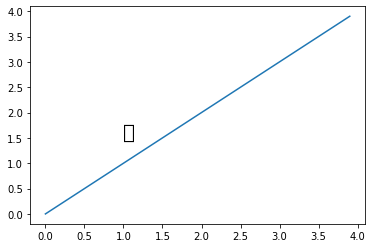

In [624]:
plt.plot(xs,xs)
plt.text(1,1.5,u_pluto,fontsize=20)

In [631]:
u_mercury = u"\u263F"
u_venus = u"\u2640"
u_earth = u"\u1F728"
u_moon = u"\u263E"
u_mars = u"\u2642"
u_jupiter = u"\u2643"
u_saturn = u"\u2644"
u_uranus = u"\u26E2"
u_neptune = u"\u2646"
u_ceres = "C"#u"\u26B3"
u_pluto = u"\u2647"
# lagrange 1-5, triton, europa, asteroids (ceres), kuiper belt, pluto, trojans (L4 and L5), oort cloud

In [632]:
[u_mercury,
u_venus,
u_earth,
u_moon,
u_mars,
u_jupiter,
u_saturn,
u_uranus,
u_neptune,
u_ceres,
u_pluto]

['☿', '♀', 'ὲ8', '☾', '♂', '♃', '♄', '⛢', '♆', 'C', '♇']

[('Mercury', '☿', 250, 1),
 ('Mercury', '☿', 40, 0),
 ('Venus', '♀', 1000, 1),
 ('Venus', '♀', 10, 1e-09),
 ('Earth', 'ὲ8', 0.1, 0.3333333333333333),
 ('L1, L2', 'L12', 30, 1),
 ('L3, L4, L5', 'L345', 3, 1),
 ('Moon', '☾', 0.5, 1),
 ('Mars', '♂', 1, 0.01),
 ('Mars', '♂', 100, 1),
 ('Ceres', 'C', 410, 1),
 ('Jupiter', '♃', 6000, 0),
 ('Saturn', '♄', 3000, 0),
 ('Uranus', '⛢', 10000, 0),
 ('Neptune', '♆', 3000, 0.3333333333333333),
 ('Pluto', '♇', 33, 1)]

In [121]:

(1+np.cos(23*np.pi/180))/2

0.9602524267262202